# I. Introduction

> Nama : Cylia Wardana

> Batch: HCK - 004

## Phase 2 Milestone 2: Natural Language Processing / NLP

## Problem Statement

Analisis ini bertujuan untuk meningkatkan kepuasan customer terhadap produk baju wanita pada e-commerce pada ulasan/review dan komentar yang diberikan oleh customer sehingga e-commerce ini bisa terus meningkatkan produk serta pelayanan yang sekiranya masih membutuhkan improvement.

## Objective

Hal ini bertujuan untuk membantu e-commerce dalam meningkatkan kepuasan customer dengan memanfaatkan analisis sentimen pada data yang dihasilkan oleh pelanggan (seperti ulasan, komentar, dan feedback) untuk mengidentifikasi pola-pola dan sentimen yang ada pada produk baju wanita yang mereka jual. Dengan demikian, e-commerce dapat menentukan produk yang paling diminati oleh pelanggan, mengetahui kekurangan atau kelebihan pada produk, serta memperbaiki dan mengembangkan produk dengan lebih baik. Selain itu, e-commerce juga dapat menentukan strategi pemasaran yang tepat dan menjaga kualitas layanan pelanggan yang baik berdasarkan hasil analisis sentimen yang diperoleh. Dari hasil sentimen ini, kita juga bisa melihat apakah customer sekiranya akan memberikan rekomendasi pada produk yang mereka suka kepada user lain sehingga hal ini bisa mempermudah perusahaan dalam melakukan strategi pemasaran.

# II. Import Libraries

In [91]:
!pip install phik
!pip install feature_engine
!pip install tensorflow
!pip install nltk
!pip install stopwords
!pip install wordcloud
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pre-processing/feature engineering
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
import ast

#modelling
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Input, LSTM, GRU, Dropout
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import EarlyStopping

#saving
import joblib

import warnings
warnings.filterwarnings("ignore")

# III. Data Loading

sumber: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [93]:
#upload file csv ke google colab
from google.colab import files
uploaded = files.upload()

Saving clothing.csv to clothing.csv


In [94]:
#load data dan cek non-standard missing values
missing_values = ["n/a", "na", "--",'?',' nan', 'no',' ?','NaN','nan']
data = pd.read_csv('clothing.csv',na_values=missing_values)

Load data dan cek apabila terdapat non-standard missing values

In [95]:
#buat copy dari data
df = data.copy()

In [96]:
#menampilkan 5 baris pertama
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [97]:
#menampilkan 5 baris terakhir
df.tail()

Unnamed: 0  Clothing ID  Age  \
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses

In [98]:
#mengganti nama unnamed kolom menjadi user_id
df.rename(columns={'Unnamed: 0':'user_id'}, inplace=True)

In [99]:
#melihat baris yang duplikat
df.duplicated().sum()

0

Tidak ada baris data yang sama / terduplikasi

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Semua kolom data sudah memiliki tipe data yang sesuai

In [101]:
#cek apakah terdapat missing value pada tiap kolom
df.isnull().sum()

user_id                       0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Terdapat 3810 missing values pada kolom title, 845 missing values pada kolom review, dan masing-masing 14 missing values pada kolom division name, department name, dan class name

In [102]:
#menghitung persentase missing value
for i in df.columns:
    if df[i].isnull().sum()>0:
        print('Persentase missing value dari',i,"=",round(df[i].isnull().sum()*100/df.shape[0],2),"%")

Persentase missing value dari Title = 16.22 %
Persentase missing value dari Review Text = 3.6 %
Persentase missing value dari Division Name = 0.06 %
Persentase missing value dari Department Name = 0.06 %
Persentase missing value dari Class Name = 0.06 %


Dikarenakan kolom Review, Division Name, Department Name dan Class Name masing-masing memiliki missing values kurang dari 5% dari keseluruhan data, maka missing values tersebut akan didrop saja / dihilangkan saja, sedangkan untuk kolom Title karena missing valuesnya mencapai 16% maka nantinya untuk missing values nya akan digantikan dengan mode/modus dari masing-masing rating. 

Pada kolom Title, missing values termasuk kedalam kategori "MAR" (Missing At Random), yang berarti nilai yang hilang pada suatu variabel tidak terkait langsung dengan nilai variabel tersebut, tetapi mungkin terkait dengan nilai variabel lain. Sehingga dalam kasus ini, teknik analisis statistik seperti imputasi dapat digunakan untuk memperkirakan nilai yang hilang.

In [103]:
#menghilangkan missing values pada kolom-kolom ini
df.dropna(subset=['Review Text','Division Name','Department Name','Class Name'],inplace=True)

In [104]:
#mengelompokkan dataframe berdasarkan rating (1-5)
a = df[df['Rating']==1]
b = df[df['Rating']==2]
c = df[df['Rating']==3]
d = df[df['Rating']==4]
e = df[df['Rating']==5]

In [105]:
#mengganti missing values menjadi nilai modus dari masing-masing rating
df['Title'] = df['Title'].fillna(a['Title'].mode()[0])
df['Title'] = df['Title'].fillna(b['Title'].mode()[0])
df['Title'] = df['Title'].fillna(c['Title'].mode()[0])
df['Title'] = df['Title'].fillna(d['Title'].mode()[0])
df['Title'] = df['Title'].fillna(e['Title'].mode()[0])

In [106]:
#cek ulang apakah terdapat missing value pada tiap kolom
df.isnull().sum()

user_id                    0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

Sudah tidak terdapat missing values

# IV. Exploratory Data Analysis

In [107]:
df.shape

(22628, 11)

Terdapat 22628 baris dan 11 kolom pada dataset ini

In [108]:
#melihat informasi variabel numerikal
df.describe().T

count          mean          std   min      25%  \
user_id                  22628.0  11737.272097  6781.574232   0.0  5868.75   
Clothing ID              22628.0    919.695908   201.683804   1.0   861.00   
Age                      22628.0     43.282880    12.328176  18.0    34.00   
Rating                   22628.0      4.183092     1.115911   1.0     4.00   
Recommended IND          22628.0      0.818764     0.385222   0.0     1.00   
Positive Feedback Count  22628.0      2.631784     5.787520   0.0     0.00   

                             50%       75%      max  
user_id                  11727.5  17617.25  23485.0  
Clothing ID                936.0   1078.00   1205.0  
Age                         41.0     52.00     99.0  
Rating                       5.0      5.00      5.0  
Recommended IND              1.0      1.00      1.0  
Positive Feedback Count      1.0      3.00    122.0

- Dari data diatas menunjukkan bahwa rentang umur orang-orang yang berbelanja pada ecommerce ini yaitu dari umur 18-99 tahun dengan rata-rata usia 43 tahun dengan asumsi orang-orang yang paruh baya lebih senang berbelanja online karena lebih efisien dalam hal tenaga dan waktu.

- Rata-rata rating yang diberikan juga cukup baik yaitu mencapai 4.1 yang berarti orang-orang lumayan puas dengan produk dan pelayanan saat berbelanja di ecommerce ini, para user juga rata-rata akan merekomendasikan produk untuk dibeli oleh user lain karena rata-ratanya mendekati angka 1 (0.8).

- User juga bisa memberikan feedback yang positif terhadap review dari user lain, yang bisa diartikan bahwa user-user ini setuju dengan review yang diberikan, feedback positive yang paling banyak diterima dari suatu review pada ecommerce ini adalah sebanyak 122.


In [109]:
#melihat informasi variabel kategori
df.describe(include='object').T

count unique  \
Title            22628  13983   
Review Text      22628  22621   
Division Name    22628      3   
Department Name  22628      6   
Class Name       22628     20   

                                                               top   freq  
Title                                                 Disappointed   3017  
Review Text      Perfect fit and i've gotten so many compliment...      3  
Division Name                                              General  13365  
Department Name                                               Tops  10048  
Class Name                                                 Dresses   6145

- Data diatas menunjukkan bahwa judul dari sebuah review paling banyak yang berjudul 'Disappointed' (Kecewa) yaitu ada sebanyak 3017, hal ini mungkin terjadi karena untuk user yang kecewa hanya akan menulis judulnya dengan kata disappointed sedangkan untuk para user yang senang / cukup puas bisa menuliskan kesenangannya dengan kata-kata lain selain hanya menuliskan 'Happy' (karena kalau dilihat dari rata-rata rating yang diberikan pada ecommerce ini cukup baik).

- Terdapat total 22621 review yang diberikan para user untuk produk-produk ecommerce ini, untuk divisi general adalah yang paling banyak dibeli/direview, untuk departemen bagian Tops/baju atasan adalah yang paling banyak dibeli/review dan dress/terusan adalah yang paling banyak dibeli/review

In [110]:
#melihat kategori apa saja yang berada pada kolom division, department dan class
for i in ['Division Name','Department Name','Class Name']:
  print (i, ':', df[i].unique(),'\n')

Division Name : ['Initmates' 'General' 'General Petite'] 

Department Name : ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend'] 

Class Name : ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises'] 



In [111]:
#mengkoreksi typo pada kolom division name bagian intimates/baju dalam
df['Division Name'] = df['Division Name'].replace('Initmates','Intimates')

In [112]:
df.groupby(['Division Name','Department Name'])[['Department Name']].count()

Department Name
Division Name  Department Name                 
General        Bottoms                     2447
               Dresses                     3619
               Jackets                      624
               Tops                        6580
               Trend                         95
General Petite Bottoms                     1215
               Dresses                     2526
               Intimate                     227
               Jackets                      378
               Tops                        3468
               Trend                         23
Intimates      Intimate                    1426

Pada divisi general dan general petite (bertubuh kecil) ada departemen bottoms/bawahan, dresses, jackets, tops dan trend, sedangkan untuk divisi intimates (pakaian dalam) hanya ada 1 departemen yaitu departemen intimates

In [113]:
#pembagian pakaian berdasarkan division, department dan class
df.groupby(['Division Name','Department Name','Class Name'])[['Class Name']].count()

Class Name
Division Name  Department Name Class Name                
General        Bottoms         Casual bottoms           1
                               Jeans                  756
                               Pants                  811
                               Shorts                 304
                               Skirts                 575
               Dresses         Dresses               3619
               Jackets         Jackets                383
                               Outerwear              241
               Tops            Blouses               1928
                               Fine gauge             663
                               Knits                 3125
                               Sweaters               864
               Trend           Trend                   95
General Petite Bottoms         Jeans                  348
                               Pants                  539
                               Skirts                 328
               Dresses         Dresses               2526
               Intimate        Lounge                 227
               Jackets         Jackets                300
                               Outerwear               78
               Tops            Blouses               1055
                               Fine gauge             396
                               Knits                 1501
                               Sweaters               516
               Trend           Trend                   23
Intimates      Intimate        Chemises                 1
                               Intimates              147
                               Layering               132
                               Legwear                158
                               Lounge                 442
                               Sleep                  214
                               Swim                   332

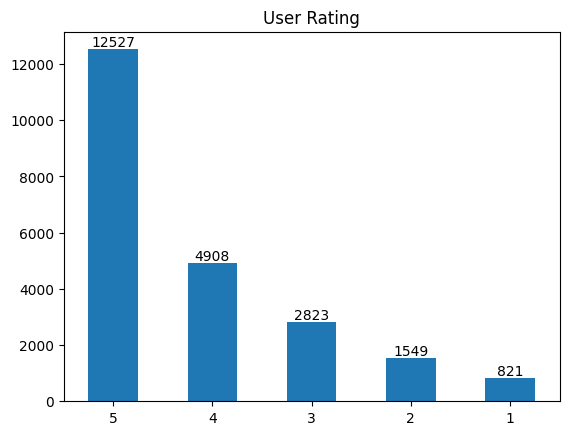

In [114]:
#membuat bar graph terhadap rating user
value_counts = df.Rating.value_counts()

fig, ax = plt.subplots()

ax = value_counts.plot(kind='bar',title='User Rating')
ax.set_xticklabels(value_counts.index, rotation=0)

for i, v in enumerate(value_counts):
    ax.text(i, v+100, str(v), ha='center', fontsize=10)

plt.show()

<Axes: title={'center': 'Rating Distribution'}, ylabel='Rating'>

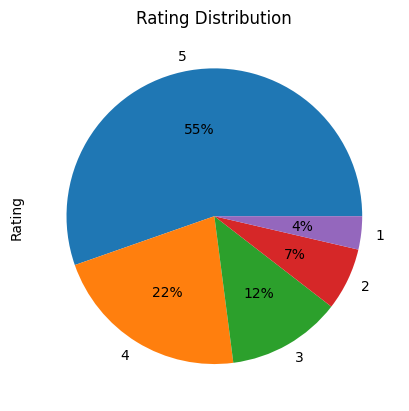

In [115]:
#membuat pie chart untuk mengetahui distribusi rating
df['Rating'].value_counts().plot(kind='pie',autopct='%0.0f%%',title='Rating Distribution')

Terlihat rating yang paling banyak diberikan user adalah 5 yaitu mencapai 55% (setengah lebih user yang menggunakan ecommerce ini)

Age skewness: 0.5156356279439589


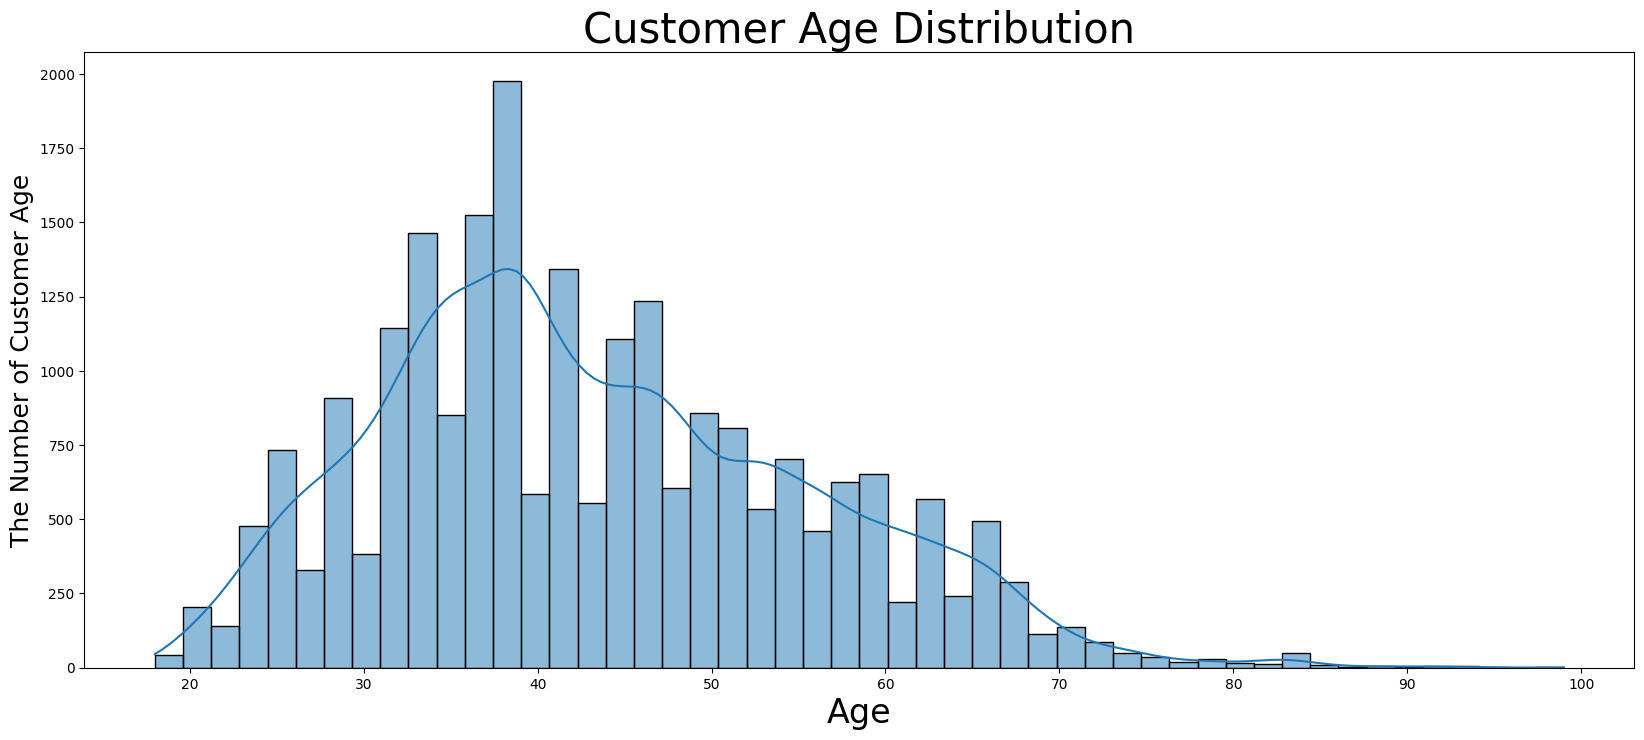

In [116]:
#melihat distribusi umur customer
print ('Age skewness:', df.Age.skew())
plt.figure(figsize = (20, 8))
plt.title('Customer Age Distribution', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("The Number of Customer Age", fontsize=18)

sns.histplot(df, x='Age', kde = True, bins = 50);

- Terlihat distribusi umur diatas termasuk normal
- Customer yang berusia 35-40 adalah yang paling banyak berbelanja melalui ecommerce, hal ini bisa terjadi karena customer pada usia-usia tersebut sudah well-off (cukup mapan) namun tidak memiliki waktu yang banyak (karena kesibukan) sehingga memilih untuk berbelanja online
- Semakin muda dan semakin tua umur customer, maka akan semakin rendah keinginan belanjanya

Feedback skewness: 6.379189312500132


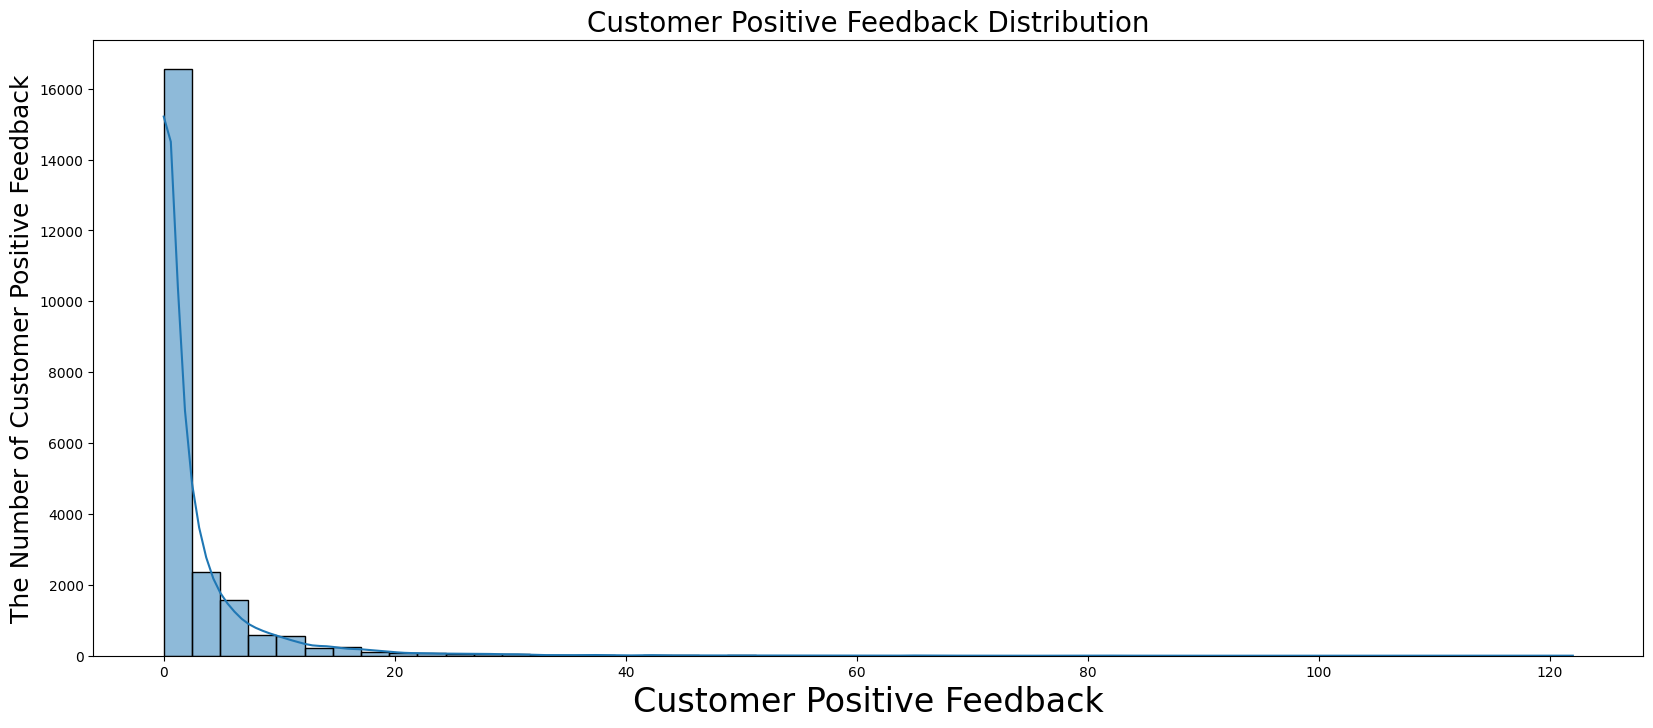

In [117]:
#melihat distribusi positive feedback customer terhadap suatu review
print ('Feedback skewness:', df['Positive Feedback Count'].skew())
plt.figure(figsize = (20, 8))
plt.title('Customer Positive Feedback Distribution', fontsize=20)
plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("The Number of Customer Positive Feedback", fontsize=18)

sns.histplot(df, x='Positive Feedback Count', kde = True, bins = 50);

Terlihat distribusi diatas tidak normal/skewed, dikarenakan user masih kurang aktif memberikan positive feedback untuk suatu review, terlihat sebagian besar user tidak memberikan feedback apapun pada suatu review.

## Analysis on Target

[Text(0, 0, '4101'), Text(0, 0, '18527')]

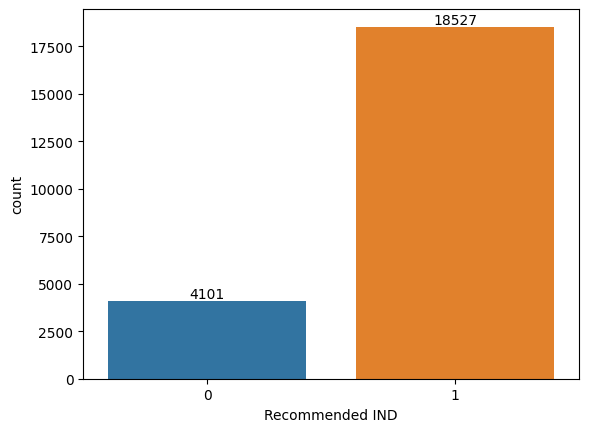

In [118]:
#membuat bar graph terhadap target
bar = sns.countplot(data=df, x='Recommended IND')
bar.bar_label(bar.containers[0])

Keterangan:
- 0 = Not Recommended 
- 1 = Recommended

Terlihat pada grafik diatas bahwa pada dataset ini, lebih banyak user yang akan merekomendasikan produk yang pernah dibelinya daripada yang tidak akan merekomendasikan produk, dimana hal ini akan sangat menguntungkan perusahaan apabila para user banyak merekomendasikan produk mereka

<Axes: ylabel='Recommended IND'>

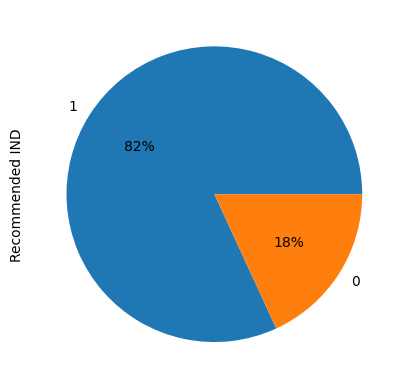

In [119]:
#membuat pie chart terhadap target
df['Recommended IND'].value_counts().plot(kind='pie',autopct='%0.0f%%')

Terlihat dari pie chart diatas, persentase user yang akan merekomendasi dan tidak akan rekomendasi yaitu sebanyak 82% dan 18% secara berurutan. Bisa dikatakan bahwa data ini tidak balance

In [120]:
#melihat ada berapa banyak barang terjual pada tiap divisi
df['Division Name'].value_counts()

General           13365
General Petite     7837
Intimates          1426
Name: Division Name, dtype: int64

[Text(0.5, 1.0, 'Rekomendasi Customer terhadap Divisi pada Ecommerce')]

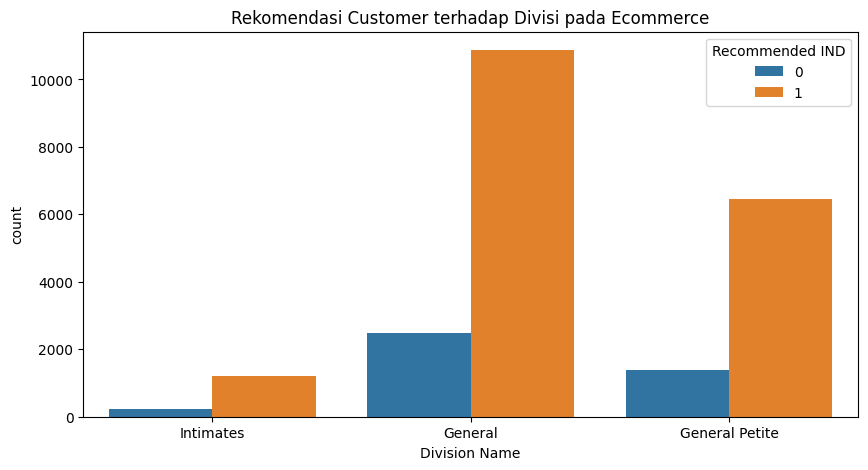

In [121]:
#membuat bar graph berdasarkan divisi pada ecommerce
plt.figure(figsize=[10,5])
sns.countplot(data = df,x = 'Division Name', hue = 'Recommended IND').set(title='Rekomendasi Customer terhadap Divisi pada Ecommerce')

Divisi General adalah divisi yang paling banyak akan direkomendasikan oleh user dimana hal ini dapat terjadi karena memang penjualan clothing pada divisi ini memang paling banyak, sama halnya dengan divisi lainnya. Jadi semakin banyak barangnya terjual akan semakin banyak juga rekomendasi yang akan diberikan customer

In [122]:
#melihat ada berapa banyak barang terjual pada tiap departemen
df['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

[Text(0.5, 1.0, 'Rekomendasi Customer terhadap Departemen pada Ecommerce')]

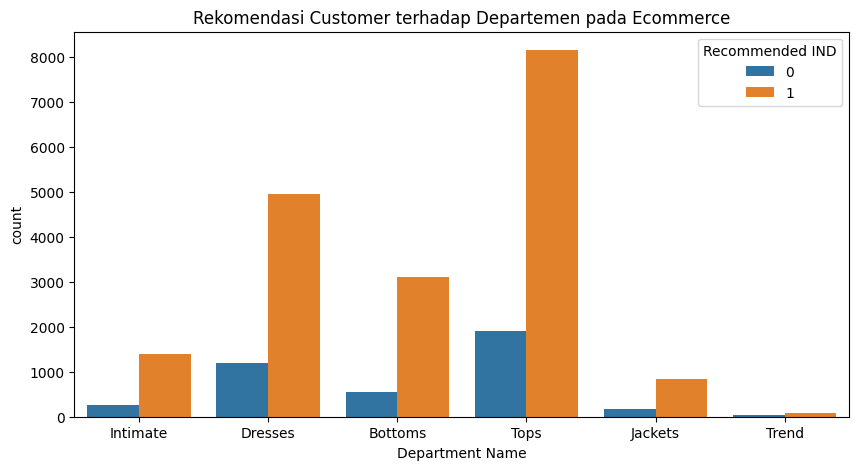

In [123]:
#membuat bar graph berdasarkan departemen pada ecommerce
plt.figure(figsize=[10,5])
sns.countplot(data = df,x = 'Department Name', hue = 'Recommended IND').set(title='Rekomendasi Customer terhadap Departemen pada Ecommerce')

Terlihat pada data diatas bahwa departemen yang menjual tops/atasan adalah yang paling banyak direkomendasi oleh customer, hal ini bisa terjadi karena memang penjualan dari tops adalah yang terbanyak.

## Feature Selection

In [124]:
#melihat daftar kolom
df.columns

Index(['user_id', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

Beberapa kolom akan saya drop/hilangkan untuk melanjutkan analisis NLP

In [125]:
#fitur yang dipilih adalah kolom review dan rekomendasi
df2 = df.iloc[:,[4,6]]

In [126]:
df2.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [127]:
df2.groupby('Recommended IND').describe()

Review Text         \
                      count unique   
Recommended IND                      
0                      4101   4100   
1                     18527  18521   

                                                                         
                                                               top freq  
Recommended IND                                                          
0                I purchased this and another eva franco dress ...    2  
1                Perfect fit and i've gotten so many compliment...    3

Ada sebanyak 4101 user yang tidak merekomendasi produk (0) dengan frekuensi review terbanyak ada 2 dan sebanyak 18527 user yang akan merekomendasi produk (1) dengan frekuensi review terbanyak ada 3

## WordCloud

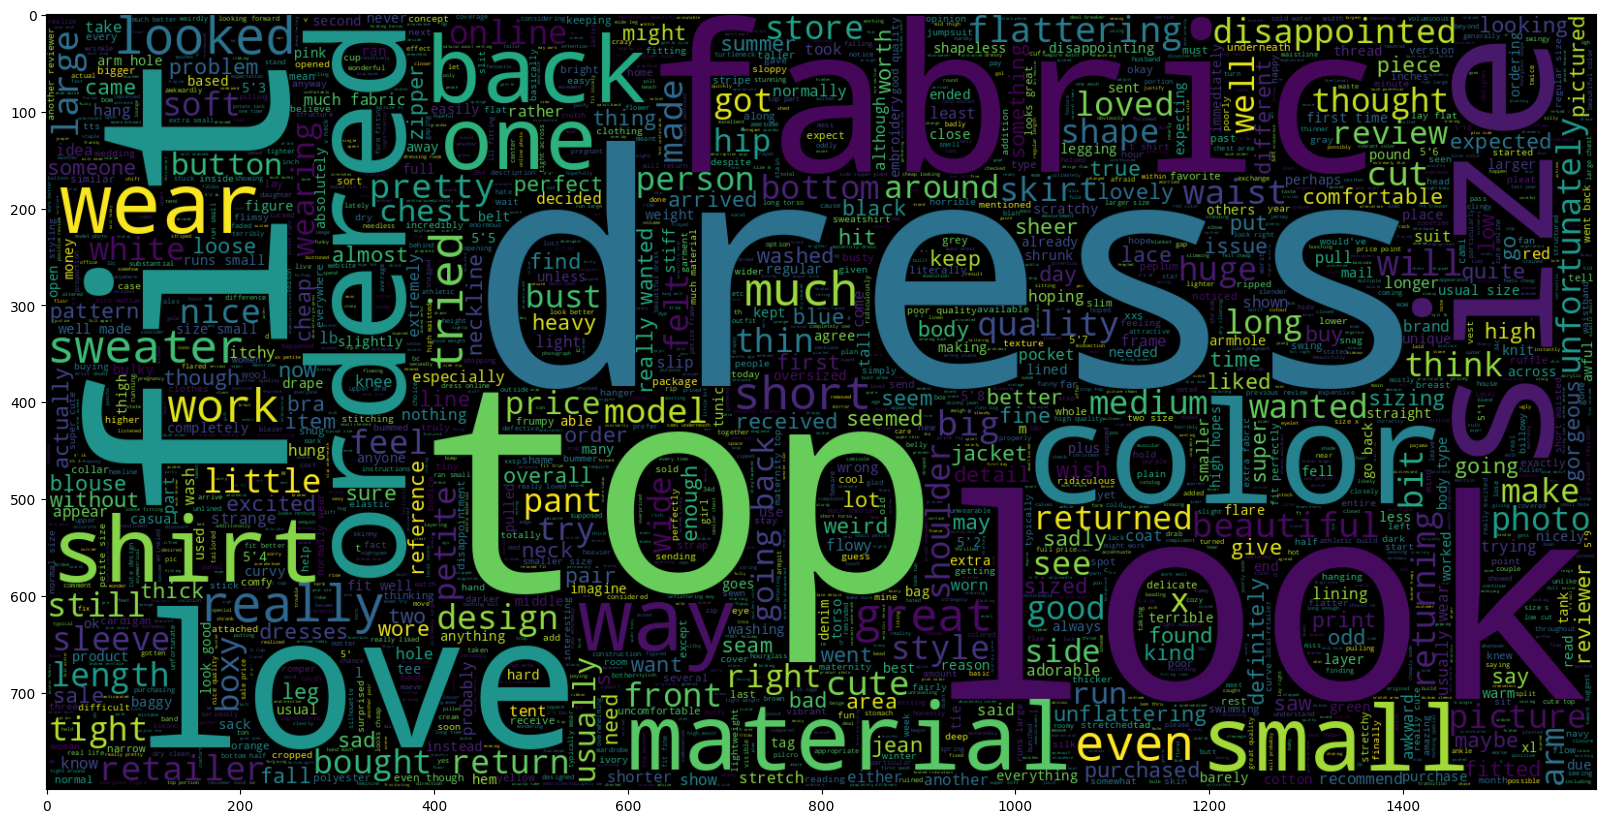

In [128]:
#membuat wordcloud untuk customer yang tidak merekomendasi (0 = not recommended)
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df2[df2['Recommended IND']== 0]['Review Text']))
plt.imshow(wc , interpolation = 'bilinear')

Pada kategori 0 ini kata-kata seperti dress, top, look, fabric sering muncul bahkan kata-kata love masih sering muncul pada kategori 0 dimana 0 = not recommended, ini bisa terjadi customer awalnya menceritakan keinginannya terlebih dahulu seperti review ini (contoh: I had such high hopes for this dress..., I really want to love this dress however...) namun pada akhirnya customer baru menceritakan kekecewaannya.

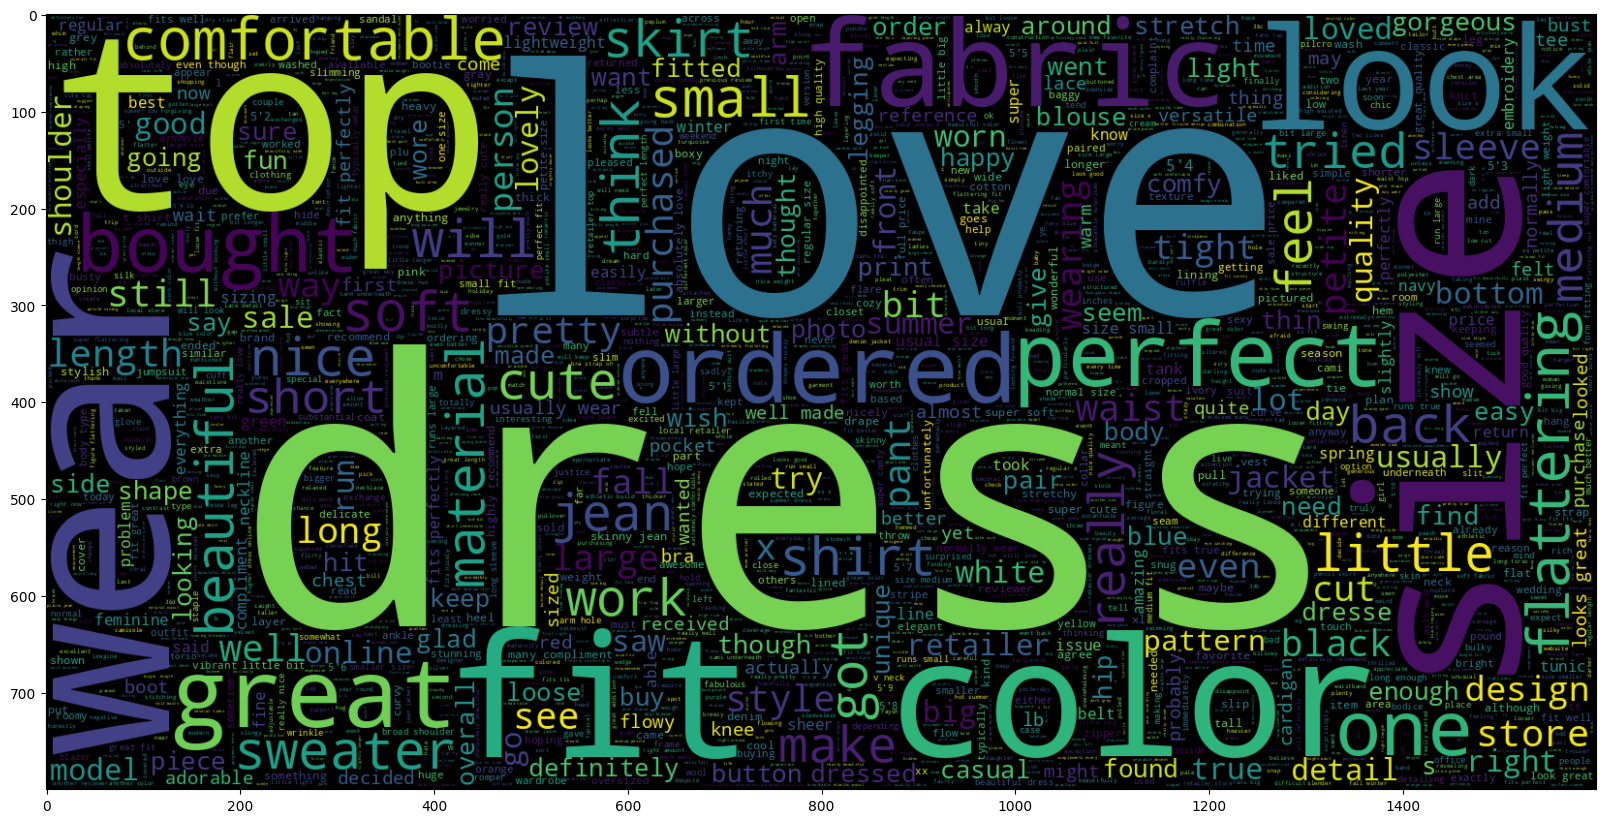

In [129]:
#membuat wordcloud untuk customer yang merekomendasi (1 = recommended)
plt.figure(figsize = (20,20)) 
wc2 = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df2[df2['Recommended IND']== 1]['Review Text']))
plt.imshow(wc2 , interpolation = 'bilinear')

Sama halnya dengan kategori 0, kategori 1 (recommended) banyak mengandung review yang memiliki kata love, dress, wear, color dan lain-lain

# V. Data Preprocessing / Feature Engingeering

## Preprocessing Single Document

In [130]:
#mengambil 1 teks review
example = df2['Review Text'].iloc[1]
example

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [131]:
#open chatwords.txt
with open('chatwords.txt') as f:
    data = f.read()

chatwords =  ast.literal_eval(data)
chatwords

{'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'A3': 'Anytime, Anywhere, Anyplace',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BC': 'because',
 'bc': 'because',
 'bcs': 'because',
 'BFN': 'Bye For Now',
 'B4N': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'B4': 'Before',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': 'For What Its Worth',
 'FYI': 'For Your Information',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GN': 'Good Night',
 'GMTA': 'Great Minds Think Alike',
 'GR8': 'Great!',
 'G9': 'Genius',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat program)',
 'ILU': 'ILU: I Love You',
 'IMHO': 'In My Honest/Humble Opinion',
 'IMO': 'In My Opinion',
 'IOW': 'In Other Words',
 'IRL': 'In Real Life',
 'KISS': 'Keep It Simpl

Mengganti seluruh kata slang bahasa inggris ke dalam bahasa baku sebenarnya

sumber: https://www.kaggle.com/code/niteshk97/nlp-text-preprocessing?scriptVersionId=112984470&cellId=24

In [132]:
temp=[]
for chat in example.split():
   if chat.upper() in chatwords:
      temp.append(chatwords[chat.upper()])
   else:
      temp.append(chat)

example = " ".join(temp)
example

'Love this dress! it\'s sooo pretty. i happened to find it in a store, and i\'m glad i did because i never would have ordered it online because it\'s petite. i bought a petite and am 5\'8". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.'

Contoh pada teks diatas kata 'bc' menjadi 'because'

In [133]:
#mengganti semua huruf menjadi huruf kecil
example = example.lower()
example

'love this dress! it\'s sooo pretty. i happened to find it in a store, and i\'m glad i did because i never would have ordered it online because it\'s petite. i bought a petite and am 5\'8". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.'

In [134]:
#open abbreviation.txt
with open('abbreviation.txt') as ab:
    ab2 = ab.read()

abbreviation =  ast.literal_eval(ab2)
abbreviation

{"what's": 'what is',
 "what're": 'what are',
 "who's": 'who is',
 "who're": 'who are',
 "where's": 'where is',
 "where're": 'where are',
 "when's": 'when is',
 "when're": 'when are',
 "how's": 'how is',
 "how're": 'how are',
 "i'm": 'i am',
 "we're": 'we are',
 "you're": 'you are',
 "they're": 'they are',
 "it's": 'it is',
 "he's": 'he is',
 "she's": 'she is',
 "that's": 'that is',
 "there's": 'there is',
 "there're": 'there are',
 "i've": 'i have',
 "we've": 'we have',
 "you've": 'you have',
 "they've": 'they have',
 "who've": 'who have',
 "would've": 'would have',
 "not've": 'not have',
 "i'll": 'i will',
 "we'll": 'we will',
 "you'll": 'you will',
 "he'll": 'he will',
 "she'll": 'she will',
 "it'll": 'it will',
 "they'll": 'they will',
 "isn't": 'is not',
 "wasn't": 'was not',
 "aren't": 'are not',
 "weren't": 'were not',
 "can't": 'can not',
 "couldn't": 'could not',
 "don't": 'do not',
 "didn't": 'did not',
 "shouldn't": 'should not',
 "wouldn't": 'would not',
 "doesn't": 'does n

Mengganti seluruh kata abbreviation bahasa inggris ke dalam bahasa baku sebenarnya

sumber: https://www.kaggle.com/code/life2short/data-processing-replace-abbreviation-of-word/notebook

In [135]:
temp2=[]
for abbr in example.split():
   if abbr in abbreviation:
      temp2.append(abbreviation[abbr])
   else:
      temp2.append(abbr)

example = " ".join(temp2)
example

'love this dress! it is sooo pretty. i happened to find it in a store, and i am glad i did because i never would have ordered it online because it is petite. i bought a petite and am 5\'8". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.'

Contoh dari teks diatas dari 'it's' menjadi 'it is'

In [136]:
#menghilangkan seluruh tanda baca
example = re.sub("[^a-zA-Z]",' ', example)
example = re.sub('\[[^]]*\]', ' ', example)
example

'love this dress  it is sooo pretty  i happened to find it in a store  and i am glad i did because i never would have ordered it online because it is petite  i bought a petite and am       i love the length on me  hits just a little below the knee  would definitely be a true midi on someone who is truly petite '

Semua tanda baca sudah tidak ada

In [137]:
#menghilangkan baris baru
example = re.sub(r"\\n", " ", example)
#menghilangkan whitespace
example = example.strip()

#teks yang sudah bersih dari tanda baca
example = ' '.join(example.split())
example

'love this dress it is sooo pretty i happened to find it in a store and i am glad i did because i never would have ordered it online because it is petite i bought a petite and am i love the length on me hits just a little below the knee would definitely be a true midi on someone who is truly petite'

Spasi dan baris yang berlebih sudah dihilangkan

In [138]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [139]:
stop_words = stopwords.words('english')

In [140]:
#menghilangkan stopwords
tokens = word_tokenize(example)
stop_words2 = ' '.join([word for word in tokens if word not in stop_words])

print('Document       (Size :', len(example.split()),') : ', example,'\n')
print('Tokens         (Size :', len(tokens),') : ', tokens,'\n')
print('Cleaned Tokens (Size :', len(stop_words2.split()),') : ', stop_words2)

Document       (Size : 64 ) :  love this dress it is sooo pretty i happened to find it in a store and i am glad i did because i never would have ordered it online because it is petite i bought a petite and am i love the length on me hits just a little below the knee would definitely be a true midi on someone who is truly petite 

Tokens         (Size : 64 ) :  ['love', 'this', 'dress', 'it', 'is', 'sooo', 'pretty', 'i', 'happened', 'to', 'find', 'it', 'in', 'a', 'store', 'and', 'i', 'am', 'glad', 'i', 'did', 'because', 'i', 'never', 'would', 'have', 'ordered', 'it', 'online', 'because', 'it', 'is', 'petite', 'i', 'bought', 'a', 'petite', 'and', 'am', 'i', 'love', 'the', 'length', 'on', 'me', 'hits', 'just', 'a', 'little', 'below', 'the', 'knee', 'would', 'definitely', 'be', 'a', 'true', 'midi', 'on', 'someone', 'who', 'is', 'truly', 'petite'] 

Cleaned Tokens (Size : 27 ) :  love dress sooo pretty happened find store glad never would ordered online petite bought petite love length hits

Dari 66 kata, setelah dibersihkan menggunakan stopwords sisanya menjadi 29 kata saja

Stopwords adalah kata-kata yang sering muncul dalam suatu bahasa, namun tidak memiliki makna khusus secara individual dalam konteks pemrosesan bahasa alami, seperti 'of', 'the', 'a', 'has', dan lainnya. Dalam pemrosesan teks, seringkali stopwords dihilangkan karena keberadaan mereka tidak memberikan informasi yang berarti dalam analisis teks, dan hanya menyumbang ke noise dalam data. Oleh karena itu, penghilangan stopwords dari teks biasanya merupakan bagian dari pra-pemrosesan teks yang dilakukan sebelum analisis atau pembelajaran mesin dilakukan. Selain itu, penghilangan stopwords dapat membantu mengurangi dimensi fitur dalam model pembelajaran mesin dan meningkatkan akurasi dalam klasifikasi teks, karena informasi yang lebih penting dapat diberikan pada kata-kata yang memiliki makna spesifik dalam konteks teks tersebut. (Sumber: https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a#:~:text=Why%20do%20we%20remove%20stop,focus%20to%20the%20important%20information)

In [141]:
#normalisasi stemming
ps = PorterStemmer()
example_ps = [ps.stem(word) for word in stop_words2.split()]
#normalisasi lemmatization
lem = WordNetLemmatizer()
example_lem = [lem.lemmatize(word) for word in stop_words2.split()]

stem = pd.DataFrame({'Original':stop_words2.split(),'Stemming':example_ps,'Lemmatization':example_lem})
stem.head(15)

Original Stemming Lemmatization
0       love     love          love
1      dress    dress         dress
2       sooo     sooo          sooo
3     pretty   pretti        pretty
4   happened   happen      happened
5       find     find          find
6      store    store         store
7       glad     glad          glad
8      never    never         never
9      would    would         would
10   ordered    order       ordered
11    online    onlin        online
12    petite    petit        petite
13    bought   bought        bought
14    petite    petit        petite

Terlihat perbedaan dari hasil stemming dan lemmatization diatas

- Stemming dan Lemmatization adalah teknik dalam pemrosesan bahasa alami yang digunakan untuk menghasilkan bentuk dasar dari kata-kata dalam sebuah teks.
- Stemming adalah teknik yang memotong akhiran kata dengan tujuan untuk menghasilkan kata dasar. Stemming memangkas kata dengan aturan tertentu, sehingga bentuk dasarnya dapat dihasilkan dengan cepat dan mudah. Namun, hasil stemming mungkin tidak selalu benar, karena seringkali kata yang berbeda makna dapat memiliki akar kata yang sama.
- Lemmatization, di sisi lain, menghasilkan bentuk dasar kata dengan mempertimbangkan konteks kata dalam kalimat. Hasil dari lemmatization selalu merupakan kata dasar yang benar dari suatu kata. Lemmatization biasanya membutuhkan waktu lebih lama dan sumber daya yang lebih banyak dibandingkan dengan stemming.

(sumber: https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/#:~:text=Stemming%20and%20lemmatization%20are%20methods,more%20detailed%20explanations%20and%20examples)

Karena pada kasus ini kita menganalisa review dari customer sebaiknya yang digunakan adalah Lemmatization untuk menghindari kesalahpahaman dari review tersebut

## Preprocessing Whole Document

Setelah mencoba pada 1 teks dokumen/review, kita akan coba perlakukan pada seluruh dokumen

In [142]:
def check_chatwords(text):
    temp=[]
    for chat in text.split():
        if chat.upper() in chatwords:
            temp.append(chatwords[chat.upper()])
        else:
            temp.append(chat)
    return " ".join(temp)

def lower(text):
    data = text.lower()
    return data 

def check_abbr(text):
    temp2=[]
    for abbr in text.split():
      if abbr in abbreviation:
          temp2.append(abbreviation[abbr])
      else:
          temp2.append(abbr)

    return " ".join(temp2)

def check_punctuation(text):
    data = re.sub("[^a-zA-Z]",' ', text)
    data = re.sub('\[[^]]*\]', ' ', data)
    data = re.sub(r"\\n", " ", data)
    data = data.strip()
    data = ' '.join(data.split())
    return data   

def token_stopwords_lemma(text):
    tokens = word_tokenize(text)
    stop_words2 = ' '.join([word for word in tokens if word not in stop_words])
    data = [lem.lemmatize(word) for word in stop_words2.split()]
    data = ' '.join(data)
    return data

Semua fungsi telah dibuat dan bisa diaplikasikan dengan menggunakan fungsi apply lambda dibawah

In [143]:
df2['Review Text'] = df2['Review Text'].apply(lambda j: check_chatwords(j))
df2['Review Text'] = df2['Review Text'].apply(lambda k: lower(k))
df2['Review Text'] = df2['Review Text'].apply(lambda l: check_abbr(l))
df2['Review Text'] = df2['Review Text'].apply(lambda m: check_punctuation(m))
df2['Review Text'] = df2['Review Text'].apply(lambda n: token_stopwords_lemma(n))

In [144]:
#memperlihatkan 3 data yang sudah dibersihkan
df2['Review Text'].sample(3)

22316    dress adorable comfortable flattering thing un...
15457    simple blazer cute detail button back lining l...
657      recognized fact dress likely intended lounging...
Name: Review Text, dtype: object

In [145]:
#memperlihatkan 1 data full yang sudah dibersihkan
df2['Review Text'].iloc[29]

'sweater comfy classic balance quirky hand knit look beautiful color practical fit bit cropped boxy part style others mentioned gap knit make see opinion make perfect layering like longer camisole showing underneath wearing little dress warm still thin enough fit jacket coat'

## Imbalance Handling

Imbalance data harus dihandle karena bisa mempengaruhi kualitas model machine learning yang dibangun. Sebagai contoh, jika terdapat dataset dengan kelas A sebanyak 90% dan kelas B sebanyak 10%, maka model yang dibangun cenderung akan memprediksi dengan akurasi yang tinggi untuk kelas A dan performa yang buruk untuk kelas B. Hal ini bisa menjadi masalah jika kelas B sebenarnya adalah kelas yang penting dalam suatu kasus, misalnya dalam diagnosis penyakit langka atau pendeteksian fraud pada transaksi keuangan. (sumber: https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/)

Karena data tidak balance maka dilakukan imbalance handling secara manual, yaitu melakukan undersampling pada data mayoritas yaitu pada kategori 1 (recommended):

In [146]:
#total data pada kategori 0 adalah 4101
df_0 = df2[df2['Recommended IND']==0]

In [147]:
#maka total sample yang diambil pada kategori 1 adalah 4101 juga
df_1 = df2[df2['Recommended IND']==1].sample(4101,random_state=42)

In [148]:
#menggabungkan kembali data yang sudah dilakukan imbalance handling
df3 = pd.concat([df_0,df_1],axis=0)
df3.sample(10)

Review Text  Recommended IND
3181   like design color cardigan got green like deta...                0
8681   bought week back saw blue one store touched ex...                1
5970   shirt cute casual look fit exactly like model ...                1
14524  adorable top style felt silly wearing big bow ...                0
1444   love style dress length hem waist detail mater...                1
6024   really liked top saw yellow fence ordering ord...                1
17010  wait wear hot south wear many way material won...                1
7996   dress beautiful even husband complimented seve...                1
10191  dress good quality beautiful beading bodice he...                1
1205   really wanted love dress bought photoshoot out...                0

## Split

In [149]:
#melakukan split pada data train dan data test
X_train_val, X_test, y_train_val, y_test = train_test_split(df3['Review Text'], df3['Recommended IND'], test_size = 0.2, random_state = 42, stratify=df3['Recommended IND'])
#melakukan split pada data train dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.2, random_state = 42, stratify=y_train_val)

## CountVectorizer

In [150]:
Vectorize   = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_train_vec

<5248x6548 sparse matrix of type '<class 'numpy.int64'>'
	with 133483 stored elements in Compressed Sparse Row format>

In [151]:
#mencari tahu total unique vocabs dan total maksimum kata pada sebuah kalimat
jml_vocab = len(Vectorize.vocabulary_.keys())
max_kata = max([len(i.split(" ")) for i in X_train])

print("No of unique vocabs: ", jml_vocab)
print("Max words in a sentence : ", max_kata, "words")

No of unique vocabs:  6548
Max words in a sentence :  58 words


Terdapat 34.363.904 (5248 x 6548) korpus tetapi hanya 133.483 token yang merupakan non-zero value

## Tokenization & Word Embedding

In [152]:
#text vectorization
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_kata,
                                       input_shape=(1,) 
                                       )

text_vectorization.adapt(X_train)

Vectorisasi teks (text vectorization) adalah proses mengubah teks menjadi representasi vektor yang dapat diproses oleh algoritma mesin learning. Representasi vektor ini memungkinkan komputer untuk memproses teks sebagai data numerik. (sumber: https://towardsdatascience.com/getting-started-with-text-vectorization-2f2efbec6685#:~:text=Text%20Vectorization%20is%20the%20process,(L1)%20Normalized%20Term%20Frequency)

In [153]:
#embedding
embedding = Embedding(input_dim=jml_vocab, 
                      output_dim=128, 
                      input_length=max_kata, 
                      embeddings_initializer="uniform", 
                      mask_zero=True)

Embedding digunakan untuk mengatasi masalah representasi kata dalam bentuk teks yang sulit untuk diolah oleh algoritma machine learning. Proses embedding bertujuan untuk mengubah setiap kata dalam teks menjadi vektor numerik, sehingga algoritma machine learning dapat memproses teks dengan cara yang lebih mudah dan efektif. (sumber: https://www.tensorflow.org/text/guide/word_embeddings)

# VI. Model Definition

Dibawah ini akan dilakukan modelling dengan model LSTM dan GRU, dimana nantinya model GRU akan dijadikan Model Tuning:

## LSTM

LSTM (Long Short-Term Memory) adalah sebuah arsitektur jaringan saraf tiruan yang dirancang untuk menangani masalah vanishing gradient problem pada RNN (Recurrent Neural Network) tradisional. Masalah menghilangnya gradien terjadi ketika gradien fungsi kesalahan terhadap bobot jaringan menjadi terlalu kecil, sehingga membuat jaringan sulit untuk belajar pola hubungan jangka panjang. (sumber: https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/)

In [187]:
#define model
model2 = Sequential()
model2.add(text_vectorization)
model2.add(embedding)
model2.add(LSTM(32, return_sequences=True))
model2.add(LSTM(32))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))

#compile
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 58)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 58, 128)           838144    
                                                                 
 lstm_6 (LSTM)               (None, 58, 32)            20608     
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                      

- Dropout adalah teknik regularisasi yang digunakan untuk mencegah overfitting. Lapisan ini menghapus secara acak 20% (0.2) dari unit-unit pada lapisan sebelumnya selama proses pelatihan.
- Layer Dense dengan 1 unit dan aktivasi sigmoid. Lapisan ini mengambil input berupa vektor output dari lapisan sebelumnya dan menghasilkan sebuah nilai skalar antara 0 dan 1, yang merepresentasikan probabilitas bahwa input termasuk ke dalam kelas positif.
- Model dicompile dengan fungsi loss 'binary_crossentropy', optimizer 'adam', dan metrik akurasi. Fungsi loss dan optimizer digunakan untuk menentukan bagaimana model akan belajar dari data selama proses pelatihan, sedangkan metrik akurasi digunakan untuk mengevaluasi performa model.

## GRU

Model GRU (Gated Recurrent Unit) adalah salah satu jenis arsitektur model rekursif dalam pengolahan bahasa alami (natural language processing). Model GRU biasanya digunakan untuk tugas-tugas seperti klasifikasi teks, pemrosesan bahasa alami, atau penerjemahan mesin, dan memiliki performa yang cukup baik dalam mempelajari pola-pola dalam data urutan teks. Karena struktur yang lebih sederhana dan lebih sedikit parameter dibandingkan model LSTM, model GRU dapat lebih cepat dilatih dan menghasilkan hasil yang lebih baik pada dataset yang relatif kecil. (sumber: https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

In [155]:
#define model
model3 = Sequential()
model3.add(text_vectorization)
model3.add(embedding)
model3.add(GRU(32, return_sequences=True))
model3.add(GRU(32))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation='sigmoid'))

#compile
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 58)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 58, 128)           838144    
                                                                 
 gru_2 (GRU)                 (None, 58, 32)            15552     
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                      

- Dropout adalah teknik regularisasi yang digunakan untuk mencegah overfitting. Lapisan ini menghapus secara acak 20% (0.2) dari unit-unit pada lapisan sebelumnya selama proses pelatihan.
- Layer Dense dengan 1 unit dan aktivasi sigmoid. Lapisan ini mengambil input berupa vektor output dari lapisan sebelumnya dan menghasilkan sebuah nilai skalar antara 0 dan 1, yang merepresentasikan probabilitas bahwa input termasuk ke dalam kelas positif.
- Model dicompile dengan fungsi loss 'binary_crossentropy', optimizer 'adam', dan metrik akurasi. Fungsi loss dan optimizer digunakan untuk menentukan bagaimana model akan belajar dari data selama proses pelatihan, sedangkan metrik akurasi digunakan untuk mengevaluasi performa model.

# VII. Model Training

In [156]:
earlystop = EarlyStopping(monitor='val_accuracy', patience= 3, restore_best_weights= True)

EarlyStopping adalah suatu teknik dalam deep learning untuk menghentikan proses pelatihan (training) model lebih awal jika tidak terdapat peningkatan kinerja pada set validasi. 

- Monitor='val_accuracy' artinya model akan memantau akurasi (accuracy) pada set validasi (val) dan akan berhenti jika tidak ada peningkatan pada akurasi setelah beberapa epoch.
- Patience=3 artinya model akan menunggu selama 3 epoch (siklus pelatihan) sebelum menghentikan pelatihan jika tidak ada peningkatan pada akurasi.
- restore_best_weights=True artinya model akan menggunakan bobot terbaik pada saat terjadi peningkatan pada akurasi untuk membangun kembali model setelah pelatihan berhenti.

sumber: https://keras.io/api/callbacks/early_stopping/




Dibawah ini adalah proses pelatihan / training dari kedua model (LSTM dan Gru):

## LSTM Training

In [188]:
%%time
train_model2 = model2.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=earlystop)

Epoch 1/50
164/164 [==============================] - 33s 128ms/step - loss: 0.2290 - accuracy: 0.9310 - val_loss: 0.4635 - val_accuracy: 0.8317
Epoch 2/50
164/164 [==============================] - 16s 96ms/step - loss: 0.1093 - accuracy: 0.9686 - val_loss: 0.5447 - val_accuracy: 0.8324
Epoch 3/50
164/164 [==============================] - 16s 96ms/step - loss: 0.0961 - accuracy: 0.9726 - val_loss: 0.5742 - val_accuracy: 0.8286
Epoch 4/50
164/164 [==============================] - 16s 95ms/step - loss: 0.0864 - accuracy: 0.9748 - val_loss: 0.5795 - val_accuracy: 0.8233
Epoch 5/50
164/164 [==============================] - 17s 105ms/step - loss: 0.0846 - accuracy: 0.9769 - val_loss: 0.5698 - val_accuracy: 0.8172
CPU times: user 2min 15s, sys: 2.8 s, total: 2min 18s
Wall time: 1min 36s


Pada training model LSTM, digunakan epoch 50 dan pada saat pelatihan berhenti pada epoch ke-5 dengan waktu training adalah 1 menit 36 detik. Nilai loss pada data validasi (val_loss) yang didapat pada model ini adalah 0.56, sedangkan nilai akurasi pada data validasi (val_accuracy) adalah 0.81

## GRU Training

In [158]:
%%time
train_model3 = model3.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=earlystop)

Epoch 1/50
164/164 [==============================] - 33s 142ms/step - loss: 0.3648 - accuracy: 0.8601 - val_loss: 0.3680 - val_accuracy: 0.8423
Epoch 2/50
164/164 [==============================] - 17s 101ms/step - loss: 0.2221 - accuracy: 0.9188 - val_loss: 0.4612 - val_accuracy: 0.8195
Epoch 3/50
164/164 [==============================] - 17s 104ms/step - loss: 0.1678 - accuracy: 0.9404 - val_loss: 0.4988 - val_accuracy: 0.8241
Epoch 4/50
164/164 [==============================] - 17s 105ms/step - loss: 0.1204 - accuracy: 0.9600 - val_loss: 0.4904 - val_accuracy: 0.8294
CPU times: user 1min 57s, sys: 3.44 s, total: 2min
Wall time: 1min 26s


Pada training model GRU, digunakan epoch 50 dan pada saat pelatihan berhenti pada epoch ke-4 dengan waktu training adalah 1 menit 26 detik yang berarti ada percepatan waktu 10 detik dari model LSTM. Nilai loss pada data validasi (val_loss) yang didapat pada model ini adalah 0.49, sedangkan nilai akurasi pada data validasi (val_accuracy) adalah 0.83

# VIII. Model Evaluation

Berikut adalah evaluasi dari kedua model (LSTM dan GRU):

## LSTM Evaluation

In [189]:
history_model2_df = pd.DataFrame(train_model2.history)

<Axes: >

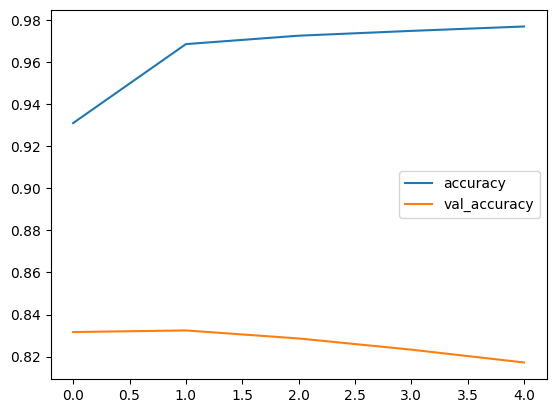

In [190]:
history_model2_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

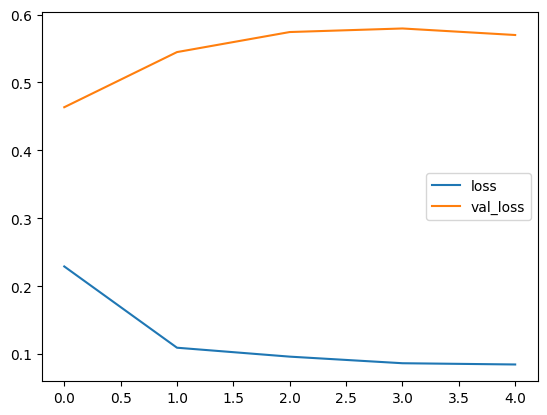

In [191]:
history_model2_df[['loss', 'val_loss']].plot()

In [192]:
y_pred2 = model2.predict(X_test)
y_pred2 = np.where(y_pred2 >=0.5, 1, 0)
print(classification_report(y_test, y_pred2))

52/52 [==============================] - 5s 22ms/step
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       821
           1       0.80      0.86      0.83       820

    accuracy                           0.82      1641
   macro avg       0.82      0.82      0.82      1641
weighted avg       0.82      0.82      0.82      1641



Text(95.72222222222221, 0.5, 'True Label')

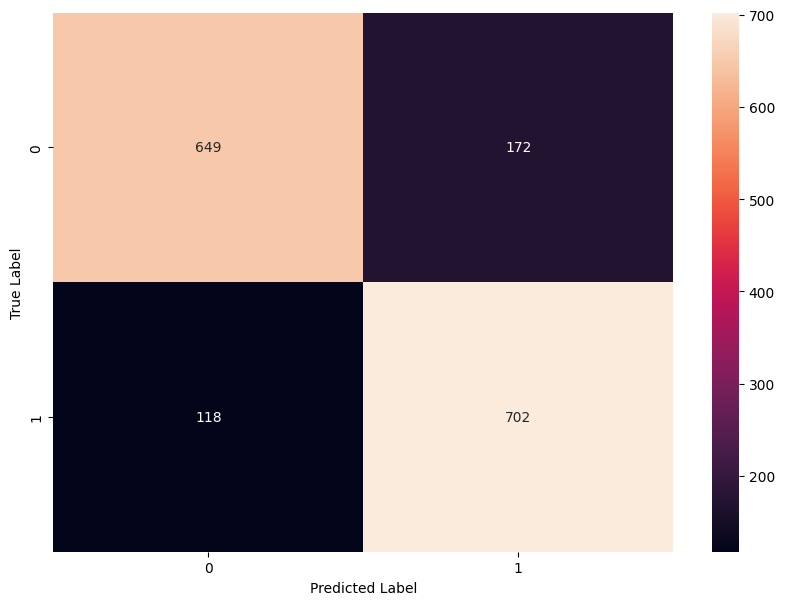

In [194]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred2)
plt.figure(figsize = (10,7))
sns.heatmap(cm2, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

- Terlihat pada kedua line graph diatas (loss dan akurasi), terlihat garis antara data train dan data validasi membentuk yang dinamakan vanishing gradient, vanishing gradient adalah masalah yang terjadi ketika gradien (gradient) dalam pelatihan model deep neural network (DNN) menjadi sangat kecil dan semakin dekat dengan nol (vanishing) ketika dilakukan backpropagation, dan kedua garis cenderung overfit pada kedua grafik loss dan akurasi.
- Karena data sudah dilakukan imbalance handling, maka kita bisa melihat nilai akurasi dari model ini yaitu 0.82 (82%).
- Terdapat 1351 kelas yang dikategorikan dengan benar, dimana untuk false positive dan false negative yang dihasilkan dari model ini adalah 172 dan 118 secara berurutan.

## GRU Evaluation

In [164]:
history_model3_df = pd.DataFrame(train_model3.history)

<Axes: >

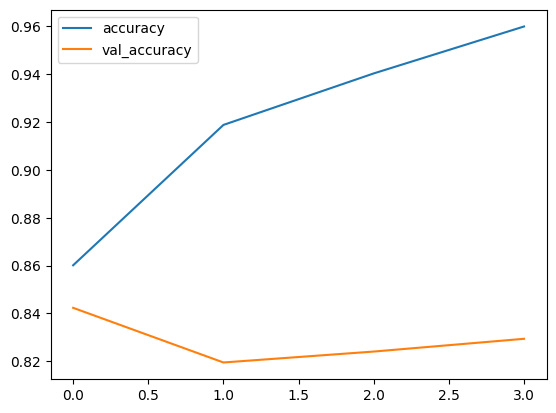

In [165]:
history_model3_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

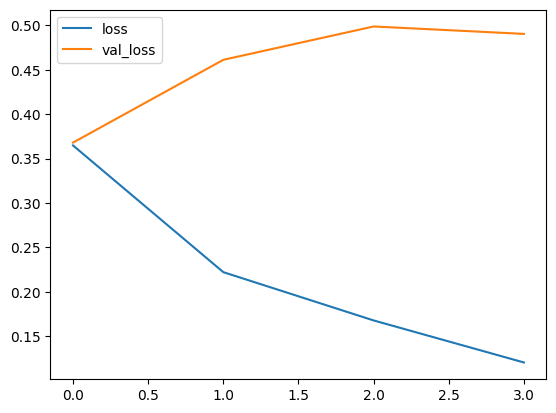

In [166]:
history_model3_df[['loss', 'val_loss']].plot()

In [167]:
y_pred3 = model3.predict(X_test)
y_pred3 = np.where(y_pred3 >=0.5, 1, 0)
print(classification_report(y_test, y_pred3))

52/52 [==============================] - 4s 19ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       821
           1       0.83      0.84      0.84       820

    accuracy                           0.84      1641
   macro avg       0.84      0.84      0.84      1641
weighted avg       0.84      0.84      0.84      1641



Text(95.72222222222221, 0.5, 'True Label')

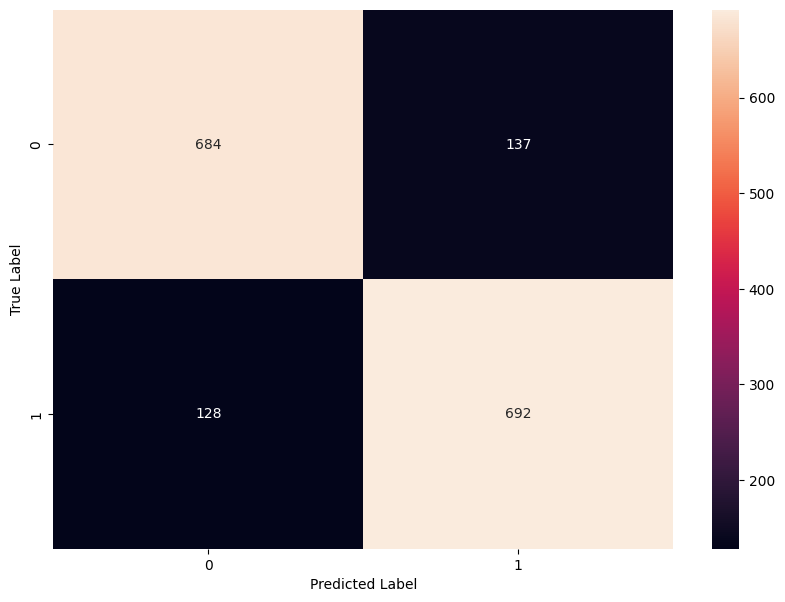

In [168]:
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred3)
plt.figure(figsize = (10,7))
sns.heatmap(cm3, annot=True,fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

- Karena data sudah dilakukan imbalance handling, maka kita bisa melihat nilai akurasi dari model ini yaitu 0.84 (84%), yang berarti ada perbaikan dari model sebelumnya (LSTM).Walaupun pada kedua line graph loss dan validasi pada model masih cenderung overfit pada kedua garis. 
- Terdapat 1376 kelas yang dikategorikan dengan benar, dimana hal ini juga sebagai salah satu improvement dari model LSTM (sebelumnya: 1351), untuk false positive dan false negative yang dihasilkan dari model ini adalah 137 dan 128 secara berurutan, dimana untuk nilai false positive nya berhasil menurun dari model sebelumnya tetapi nilai false negative nya terjadi kenaikan

# IX. Model Saving

Oleh karena itu untuk model yang terpilih adalah GRU model:

In [ ]:
#freeze GRU model
model3.trainable = False
model3.summary()

In [ ]:
#save model GRU
model3.save('gru_model')

# XI. Conclusion

- Model yang dicoba pada analisis kali ini ada 2 yaitu model LSTM dan model GRU dimana terlihat pada evaluasi model bahwa model GRU sedikit lebih baik performance-nya dalam segi akurasi dan waktu daripada model LSTM, oleh sebab itu model GRU yang akan digunakan pada kasus ini.

- Scoring yang digunakan adalah akurasi karena data telah dilakukan imbalance handling dan didapatkan hasil akurasi dari model GRU adalah 0.84 dan didapatkan pada model inference bahwa model ini mampu mengkategorikan review yang positif (recommended) dan negatif (not recommended) dengan cukup baik.

- Pada kasus ini, beberapa improvement sudah dibuat untuk mengurangi overfitting seperti menambahkan dropout dan memakai earlystopping namun untuk hasilnya masih cenderung overfit maka improvement lain yang bisa dilakukan adalah menggunakan regularisasi L1 atau L2: Regularisasi L1 atau L2 adalah teknik yang digunakan untuk memperkenalkan penghukuman tambahan pada bobot model selama pelatihan. Hal ini dapat membantu mengurangi overfitting pada model GRU. Kemudian menambahkan data augumentation: Data augumentation adalah teknik yang digunakan untuk menciptakan varian data dari data asli. Hal ini dapat membantu meningkatkan generalisasi model, sehingga mencegah overfitting pada model GRU. Improvement lainnya bisa juga dengan mencoba parameter-parameter lainnya.

- Model ini bisa digunakan untuk menganalisa review-review yang diberikan oleh customer mengenai produk-produk pada e-commerce ini, dimana review-review tersebut juga bisa digunakan sebagai saran kepada perusahaan sehingga dapat meng-upgrade produk-produk tersebut seperti apabila terdapat customer yang komplain mengenai size baju yang terlalu kecil, improvement yang bisa dilakukan perusahaan adalah menyediakan lebih banyak lagi range size bajunya ataupun apabila terdapat komplain mengenai bahan yang digunakan, perusahaan bisa mencari alternatif bahan lain. Semua itu bisa terlihat dari review-review yang diberikan oleh customer, selain itu biasanya customer akan merekomendasikan produk ke orang lain apabila customer tersebut suka dengan produknya sehingga customer tersebut biasanya memberikan review positif dimana hal ini juga bisa diprediksi pada model ini. Dengan bantuan model ini karena bisa memprediksi kira-kira mana saja produk yang sudah direkomendasi oleh customer, maka perusahaan bisa lebih memfokuskan ke produk yang tidak terlalu di-up oleh customer sehingga bisa melakukan strategi pemasaran dengan lebih efisien dan tepat.